# Data Exploration

Look at different features in the base data set

In [1]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X: pd.DataFrame = diabetes_130_us_hospitals_for_years_1999_2008.data.features  # type: ignore
y :pd.DataFrame = diabetes_130_us_hospitals_for_years_1999_2008.data.targets.copy()  # type: ignore

/home/mike/Git-projects/Eaton_633_Project/.venv/lib/python3.13/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


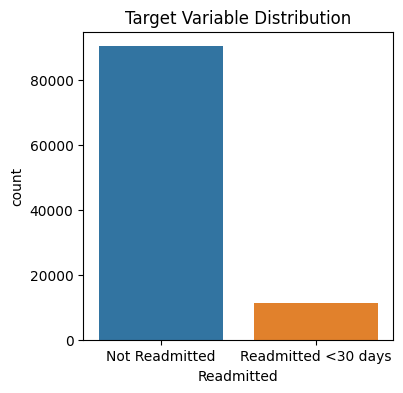

In [8]:
# target distribution

plt.figure(figsize=(4,4))

y['readmitted'] = y['readmitted'].astype('string')

y['target'] = (y['readmitted'] == '<30').astype(int)


label_map = {0: 'Not Readmitted', 1: 'Readmitted <30 days'}


y_plt = y['target'].map(label_map)


sns.countplot(x=y_plt, hue=y_plt)


plt.title('Target Variable Distribution')
plt.xlabel('Readmitted')
plt.ylabel('count')

plt.show()

In [9]:
# check columns for missing data
X.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [16]:

missing = X.isna().sum().to_frame(name='n_missing')
missing['pct_missing'] = (missing['n_missing'] / len(X) * 100).round(2)
missing = missing.sort_values('pct_missing', ascending=False)
missing.head(10)

,n_missing,pct_missing
weight,98569,96.86
max_glu_serum,96420,94.75
A1Cresult,84748,83.28
medical_specialty,49949,49.08
payer_code,40256,39.56
race,2273,2.23
diag_3,1423,1.40
diag_2,358,0.35
diag_1,21,0.02
time_in_hospital,0,0.00


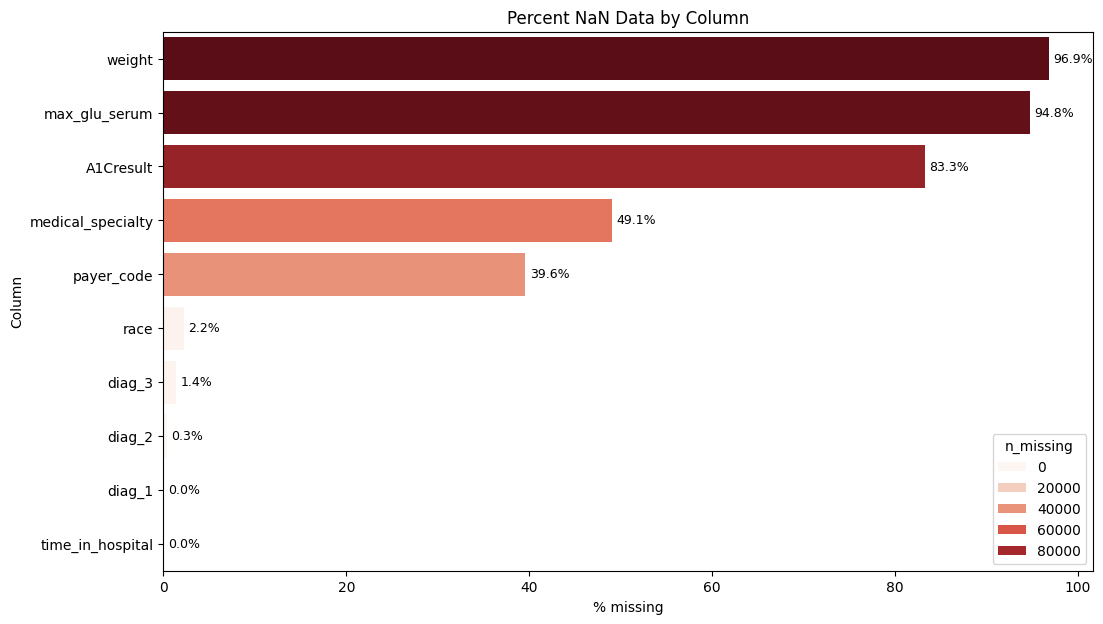

In [29]:
top_missing = missing.head(10).reset_index().rename(columns={'index':'column'})

plt.figure(figsize=(12,7))


sns.barplot(data=top_missing, x='pct_missing', y='column', palette='Reds', hue='n_missing' )
plt.title('Percent NaN Data by Column')
plt.xlabel('% missing')
plt.ylabel('Column')

for i, pct in enumerate(top_missing['pct_missing']):
    plt.text(pct + 0.5, i, f'{pct:.1f}%', va='center', fontsize=9)

plt.show()

In [34]:
# statistical summary of continuous columns

cont_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

num_df = X[cont_cols].dropna()

num_df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


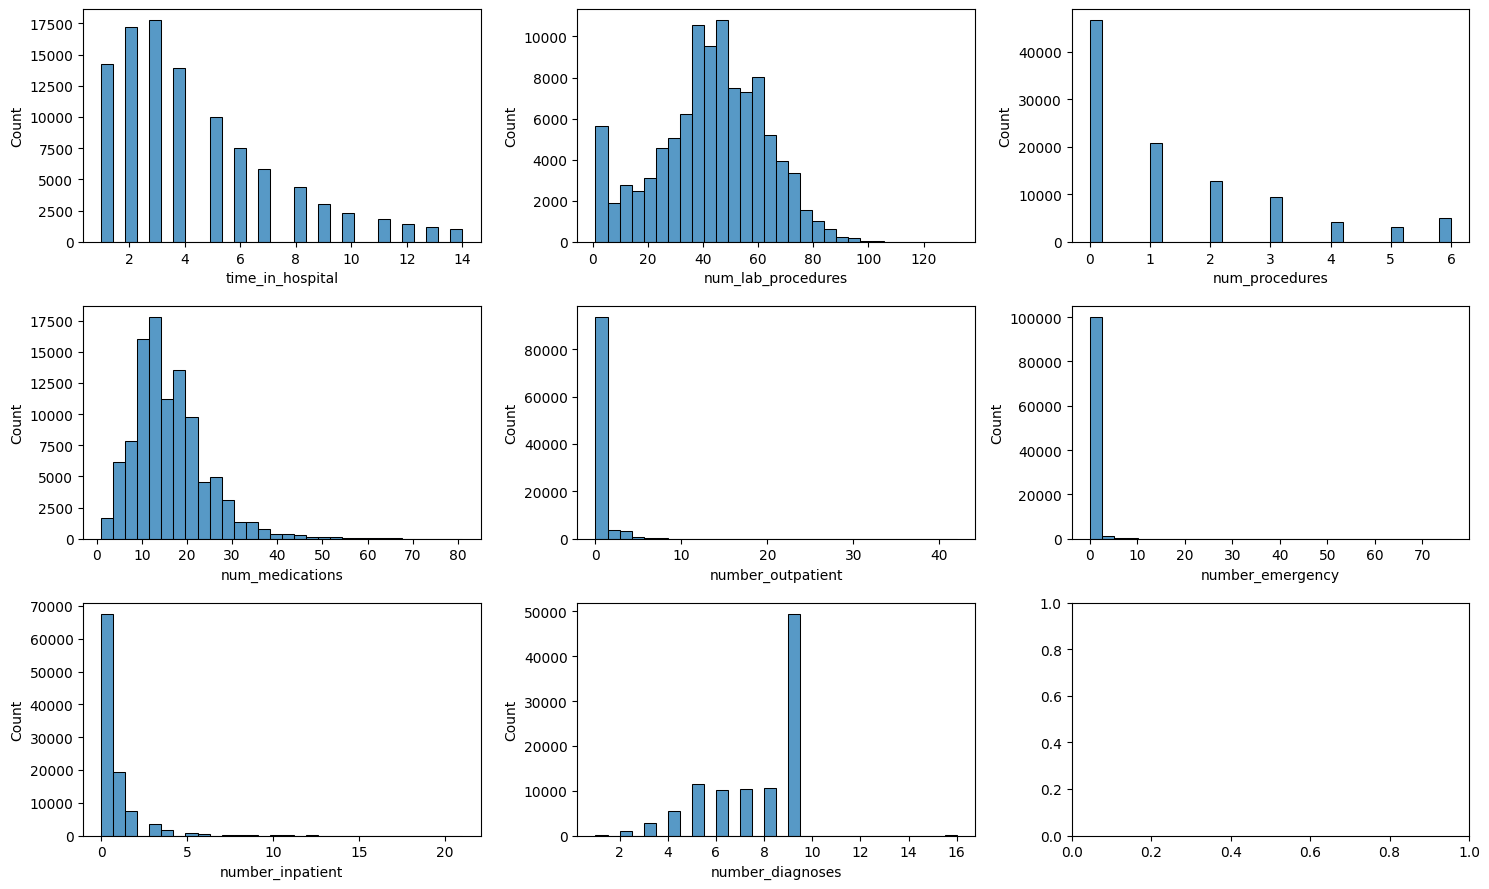

In [64]:
import math

def cont_hist_plots(num_feats_df):
    cols = num_feats_df.columns.tolist()
    n = len(cols)
    ncols = 3
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 3))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        data = num_feats_df[col].dropna()
        bins = 30
        sns.histplot(data, bins=bins, kde=False, ax=ax, color="C0", stat="count") # type: ignore

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

cont_hist_plots(num_df)


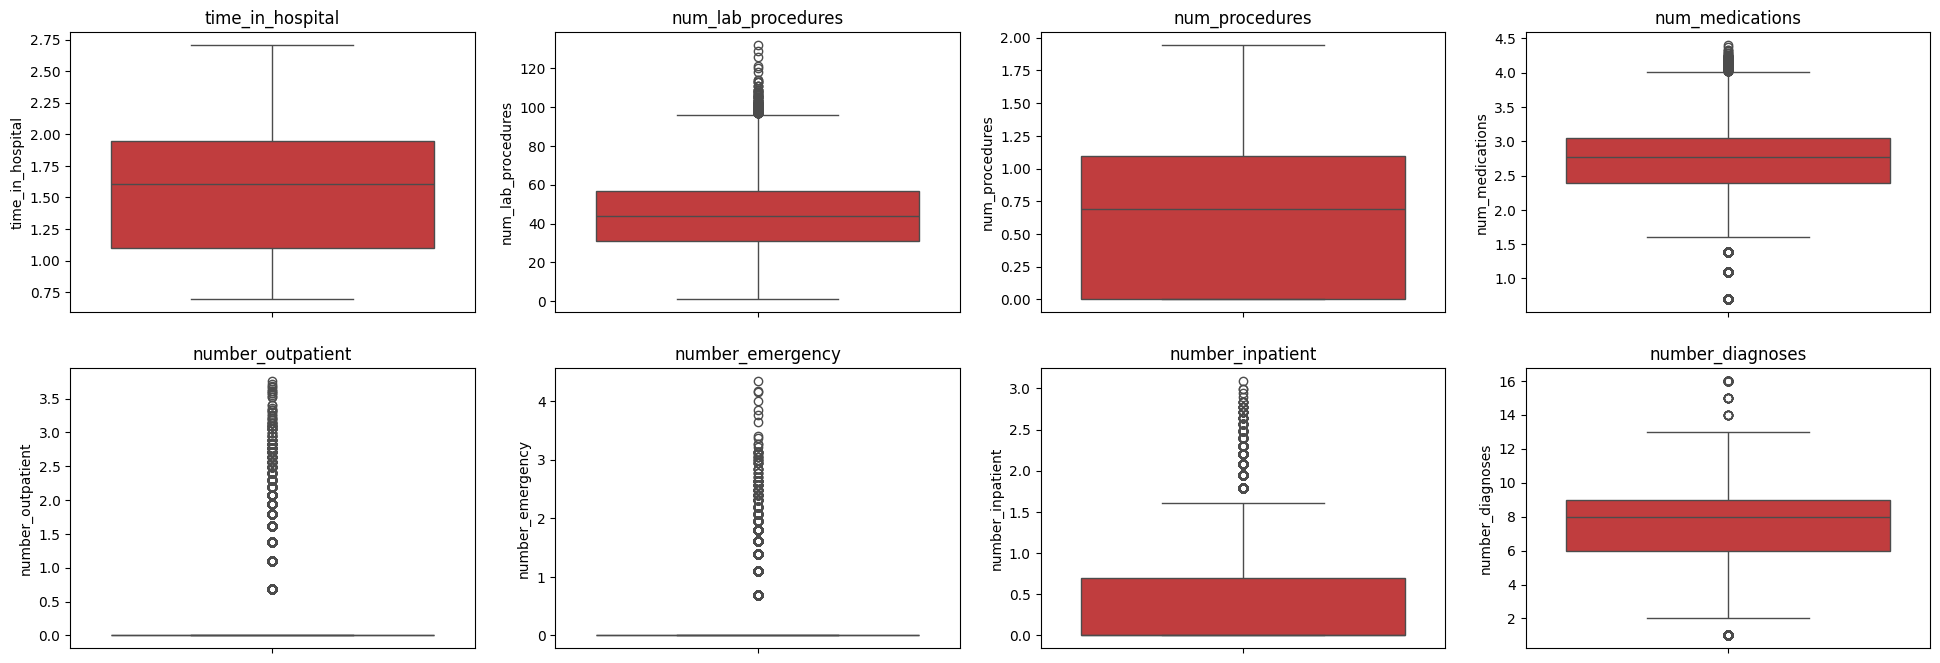

In [60]:
# bar plots, looking for outliers

num_df_log = num_df.copy()

num_df_log['number_outpatient'] = np.log1p(num_df_log['number_outpatient'].dropna())
num_df_log['number_inpatient'] = np.log1p(num_df_log['number_inpatient'].dropna())
num_df_log['number_emergency'] = np.log1p(num_df_log['number_emergency'].dropna())
num_df_log['num_medications'] = np.log1p(num_df_log['num_medications'].dropna())
num_df_log['num_procedures'] = np.log1p(num_df_log['num_procedures'].dropna())
num_df_log['time_in_hospital'] = np.log1p(num_df_log['time_in_hospital'].dropna())

cols = num_df_log.columns.to_list()


# 2) compact boxplots (quickly highlights outliers)
fig, axes = plt.subplots(2,4, figsize=(len(cols)*3, 8))
axes = axes.flatten()
if len(cols) == 1:
    axes = [axes]
for ax, col in zip(axes, cols):
    sns.boxplot(y=num_df_log[col], ax=ax, color='C3')
    ax.set_title(col)
    ax.set_xlabel('')

plt.show()

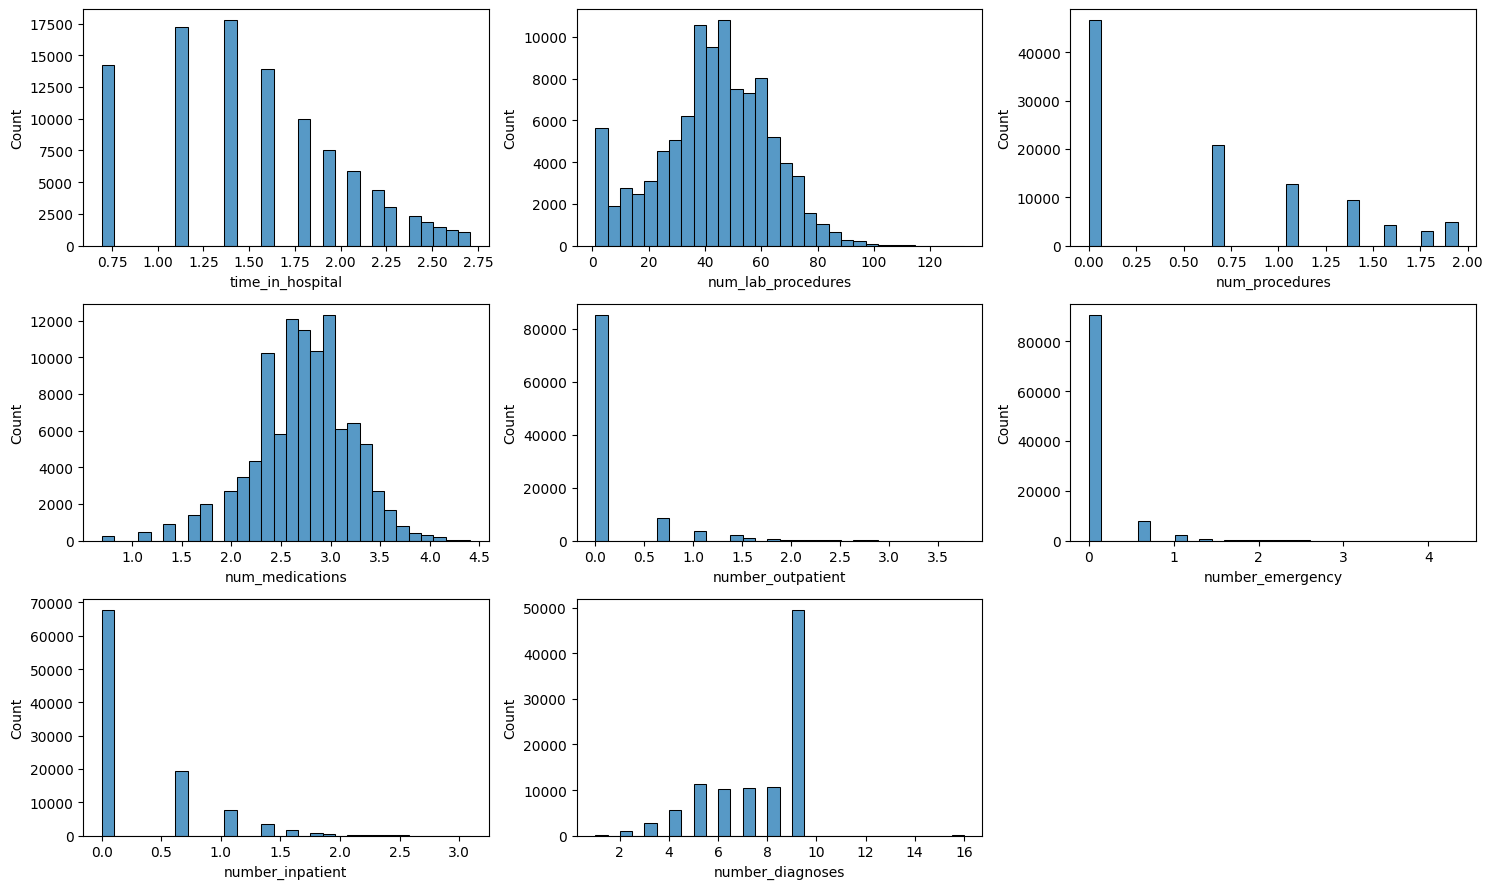

In [61]:
cont_hist_plots(num_df_log)

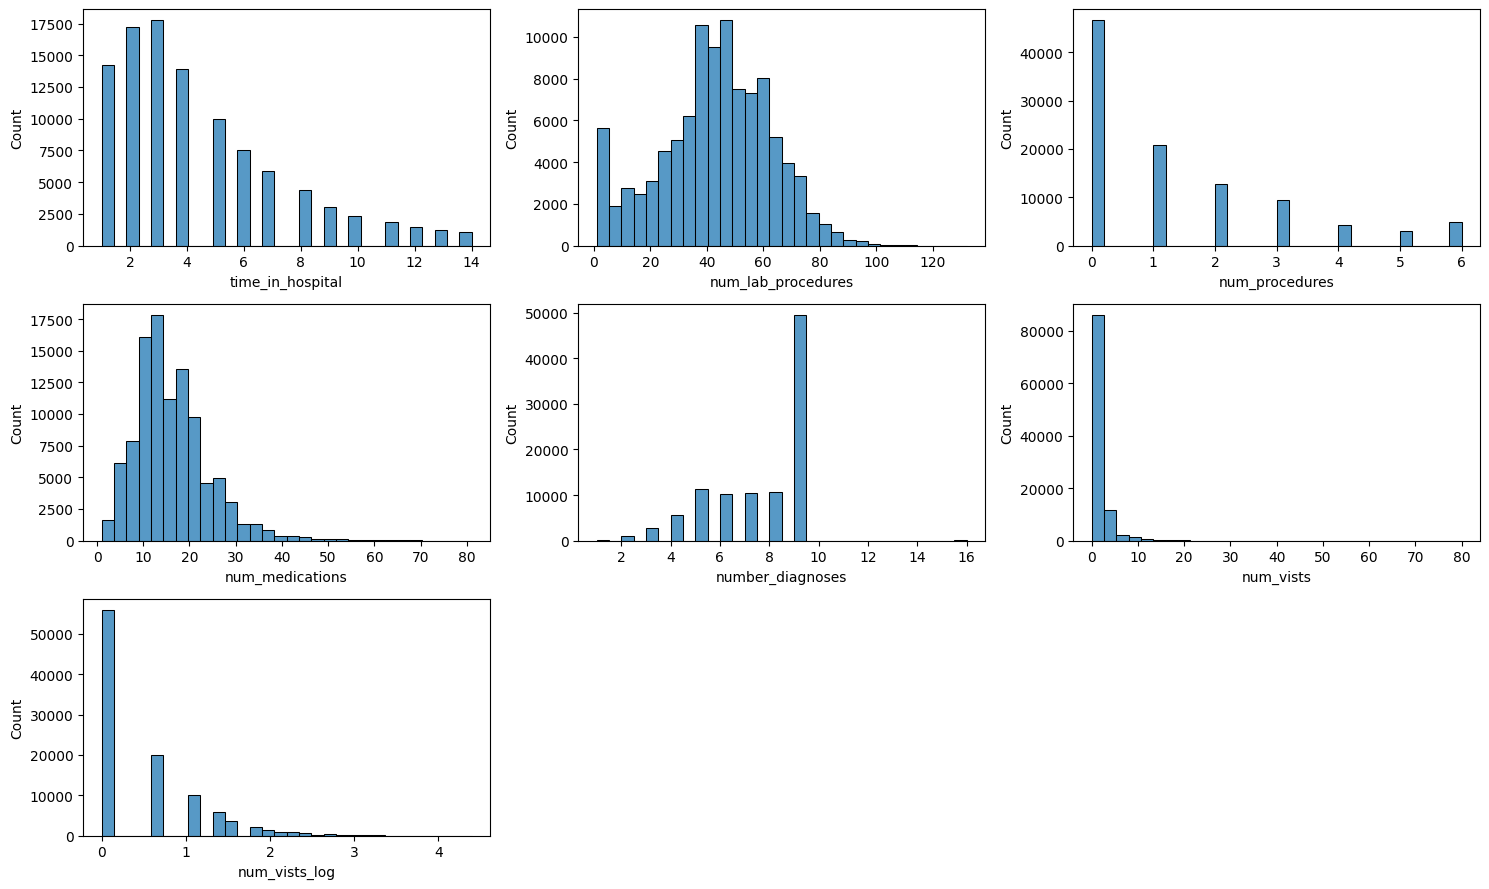

In [ ]:
# looking at combining visit columns
num_df['num_vists'] = num_df[['number_outpatient', 'number_emergency', 'number_inpatient']].sum(axis=1)

num_df_ = num_df.drop(columns=['number_outpatient', 'number_emergency', 'number_inpatient'])
num_df_['num_vists_log'] = np.log1p(num_df_['num_vists'])
cont_hist_plots(num_df_)


In [74]:
# Examine the discharge disposition data

discharge_disposition_map = {
    1: "Discharged to home",
    2: "Discharged/transferred to another short term hospital",
    3: "Discharged/transferred to SNF",
    4: "Discharged/transferred to ICF",
    5: "Discharged/transferred to another type of inpatient care institution",
    6: "Discharged/transferred to home with home health service",
    7: "Left AMA",
    8: "Discharged/transferred to home under care of Home IV provider",
    9: "Admitted as an inpatient to this hospital",
    10: "Neonate discharged to another hospital for neonatal aftercare",
    11: "Expired",
    12: "Still patient or expected to return for outpatient services",
    13: "Hospice / home",
    14: "Hospice / medical facility",
    15: "Discharged/transferred within this institution to Medicare approved swing bed",
    16: "Discharged/transferred/referred another institution for outpatient services",
    17: "Discharged/transferred/referred to this institution for outpatient services",
    18: "NULL",
    19: "Expired at home. Medicaid only, hospice.",
    20: "Expired in a medical facility. Medicaid only, hospice.",
    21: "Expired, place unknown. Medicaid only, hospice.",
    22: "Discharged/transferred to another rehab fac including rehab units of a hospital.",
    23: "Discharged/transferred to a long term care hospital.",
    24: "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
    25: "Not Mapped",
    26: "Unknown/Invalid",
    27: "Discharged/transferred to a federal health care facility.",
    28: "Discharged/transferred/referred to a psychiatric hospital or psychiatric distinct part unit of a hospital",
    29: "Discharged/transferred to a Critical Access Hospital (CAH).",
    30: "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"
}

X_discharge = X['discharge_disposition_id'].map(discharge_disposition_map)

X_discharge.value_counts()


discharge_disposition_id
Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
NULL                                                                                                          3691
Discharged/transferred to another short term hospital                                                         2128
Discharged/transferred to another rehab fac including rehab units of a hospital.                              1993
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1184
Not Mapped                                             